# Seattle Collisions (2003-2020) Data Analysis

### In this project an attempt is made to analyse the severity of car crashes given certain conditions for the capstone project associated with the IBM Data Science Professional Certificate


In [1]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Data Understanding and Preprocessing 

In [2]:
df=pd.read_csv(r"C:\Users\shane\Documents\Collisions.csv")
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.309876,47.639559,1,74300,74300,2827840,Matched,Block,NaN,E LYNN ST BETWEEN BOYER AVE E AND 18TH AVE E,...,Dry,Daylight,NaN,7259018.0,NaN,32,One parked--one moving,0,0,N
1,-122.342572,47.607795,2,56900,56900,2625188,Matched,Block,NaN,ALASKAN WAY BETWEEN ALASKAN E RDWY WAY AND PIK...,...,Dry,Daylight,NaN,6328024.0,NaN,32,One parked--one moving,0,0,N
2,-122.319539,47.619917,3,61600,61600,2617309,Matched,Intersection,29053.0,10TH AVE E AND E JOHN ST,...,Dry,Daylight,NaN,6361017.0,NaN,10,Entering at angle,0,0,N
3,-122.344997,47.725036,4,325640,327140,E955226,Matched,Block,NaN,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
4,-122.325059,47.598352,5,325615,327115,E978670,Matched,Intersection,30515.0,MAYNARD AVE S AND S KING ST,...,Dry,Daylight,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N


In [3]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [4]:
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213346.000000,213346.000000,220812.000000,220812.000000,220812.000000,71645.000000,220812.000000,220812.00000,220812.000000,220812.000000,220812.000000,220812.000000,220812.000000,220811.000000,1.272050e+05,220812.000000,2.208120e+05
mean,-122.330748,47.620213,110406.500000,144215.422599,144440.331993,37612.833415,2.227094,0.03815,0.027317,1.730925,0.373847,0.015176,0.001680,13.382286,7.971063e+06,261.979109,9.605796e+03
std,0.030049,0.056022,63743.078158,88718.485145,89088.682466,51891.668870,1.471089,0.20185,0.164418,0.829354,0.732207,0.158055,0.044557,7.304197,2.611523e+06,3252.166951,7.156640e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55203.750000,71489.750000,71489.750000,28653.000000,2.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616078,110406.500000,126895.500000,126895.500000,29973.000000,2.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664234,165609.250000,209020.250000,209240.250000,33983.000000,3.000000,0.00000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220812.000000,333106.000000,334606.000000,757580.000000,93.000000,6.00000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
df.shape

(220812, 40)

In [6]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [8]:
df['SEVERITYCODE'].value_counts()    # We see an imbalance here with severity code = 1 being overwhelmingly the most common value
                                     # We will fix this later on, fist let's examine the data

1     137240
2      58574
0      21561
2b      3088
3        348
Name: SEVERITYCODE, dtype: int64

#### All plots refer to Seattle (2003-2020) unless otherwise stated

Text(0.5, 1.0, 'Number of Collisions vs Severity')

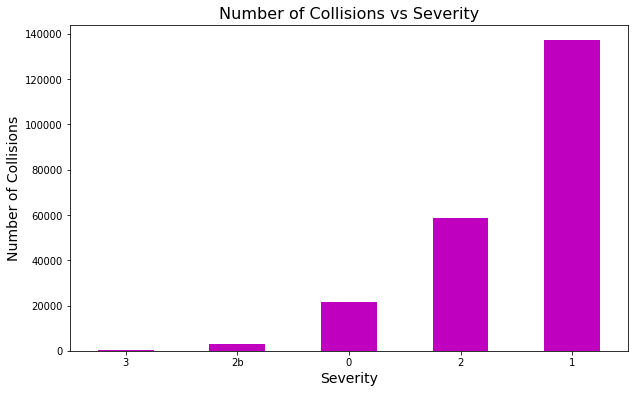

In [9]:
# Let's plot this
df['SEVERITYCODE'].value_counts(ascending=True).plot(kind='bar', figsize=(10, 6), rot = 'horizontal', color='m')
plt.xlabel('Severity', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Collisions vs Severity',fontsize=16) # add title to the plot

In [10]:
# Let's add some extra columns and create some new dataframes
df['PED/CYL']=(df['PEDCOUNT'].values)+(df['PEDCYLCOUNT'].values) # Combines pedestrian and cyclist involvement
df['INJ/FAT']=(df['SERIOUSINJURIES'].values)+(df['FATALITIES'].values) # Combines both serious injuris and fatalities
df['INCDTTM']=pd.to_datetime(df['INCDTTM']) # Change format of timestamp to extract hours, years...

# Create 4 new columns splitting the time into periods of the day, each column contains binary data
df['MORNING']=np.where((df['INCDTTM'].dt.hour >= 7) & (df['INCDTTM'].dt.hour < 12), 1, 0)    # Morning 7am-12pm
df['AFTERNOON']=np.where((df['INCDTTM'].dt.hour >= 12) & (df['INCDTTM'].dt.hour < 18), 1, 0) # Afternoon 12pm-6pm
df['EVENING']=np.where((df['INCDTTM'].dt.hour >= 18), 1, 0)                                  # Evening 6pm-12am
df['NIGHT']=np.where((df['INCDTTM'].dt.hour >= 0) & (df['INCDTTM'].dt.hour < 7), 1, 0)       # Night 12am-7am

# splitting dataset up into periods of the day
df_morn=df[(df['MORNING']==1)]
df_after=df[(df['AFTERNOON']==1)]
df_eve=df[(df['EVENING']==1)]
df_night=df[(df['NIGHT']==1)]

# Defining 5 new dataframes for each severity category
df0=df[(df['SEVERITYCODE']=='0')]
df1=df[(df['SEVERITYCODE']=='1')]
df2=df[(df['SEVERITYCODE']=='2')]
df3=df[(df['SEVERITYCODE']=='3')]
df2b=df[(df['SEVERITYCODE']=='2b')]

Text(0.5, 1.0, 'Locations with Highest Number of Severe Collisions')

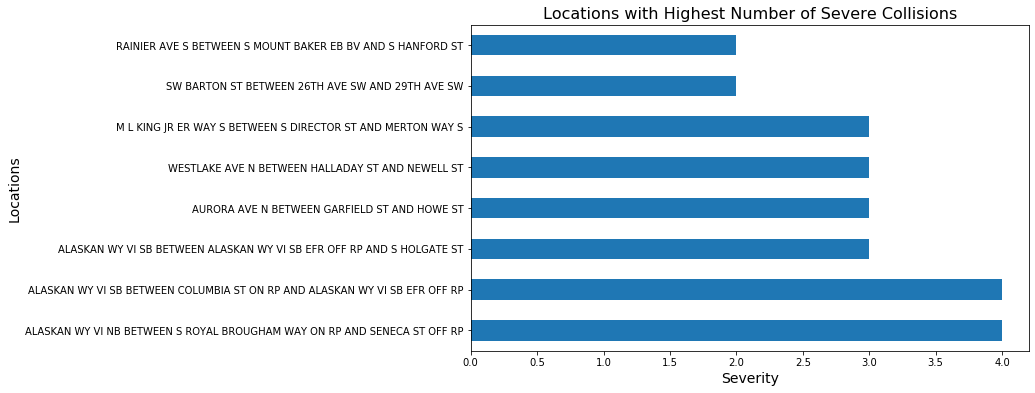

In [11]:
# Plot of 8 locations with most sever collisions
df3['LOCATION'].value_counts().head(8).plot(kind='barh', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Severity', fontsize=14) # add to x-label to the plot
plt.ylabel('Locations', fontsize=14) # add y-label to the plot
plt.title('Locations with Highest Number of Severe Collisions',fontsize=16) # add title to the plot

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [13]:
# Coordinates of Seattle
latitude = 47.6
longitude = -122.3

In [14]:
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=11)
seattle_map

In [15]:
df3['Y'].value_counts(dropna=False) # We need to get rid of Na values

NaN          9
47.519422    3
47.634735    3
47.589746    3
47.643120    3
            ..
47.561829    1
47.590308    1
47.708586    1
47.531874    1
47.578712    1
Name: Y, Length: 317, dtype: int64

In [16]:
df3_new=df3 # Create copy of dataframe only pertaining to severity = 3
df3_new['X'].value_counts(dropna=False)

 NaN           9
-122.279742    3
-122.343472    3
-122.344071    3
-122.337486    3
              ..
-122.361092    1
-122.355339    1
-122.328225    1
-122.337087    1
-122.327624    1
Name: X, Length: 317, dtype: int64

In [17]:
df3_new = df3_new[pd.to_numeric(df3_new['X'], errors='coerce').notnull()] # Get rid of Na values in longitude columns
df3_new = df3_new[pd.to_numeric(df3_new['Y'], errors='coerce').notnull()] # Get rid of Na values in latitude columns

In [18]:
df3_new.shape

(339, 46)

In [19]:
df3_new['X'].value_counts(dropna=False)

-122.279742    3
-122.344071    3
-122.343472    3
-122.337486    3
-122.344520    2
              ..
-122.361092    1
-122.355339    1
-122.328225    1
-122.337087    1
-122.295265    1
Name: X, Length: 316, dtype: int64

In [20]:
# We will create a map displaying clusters of severe collisions and their corresponding locations
from folium import plugins

# let's start again with a clean copy of the map of Seattle
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(df3_new.Y, df3_new.X):
    folium.Marker(
        location=[lat, lng],
        icon=None,
    ).add_to(incidents)

# display map
seattle_map

In [21]:
df3.shape # Check

(348, 46)

C:\Users\shane\Downloads\Python\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Text(0.5, 1.0, 'Number of Severe Collisions per Collision Type')

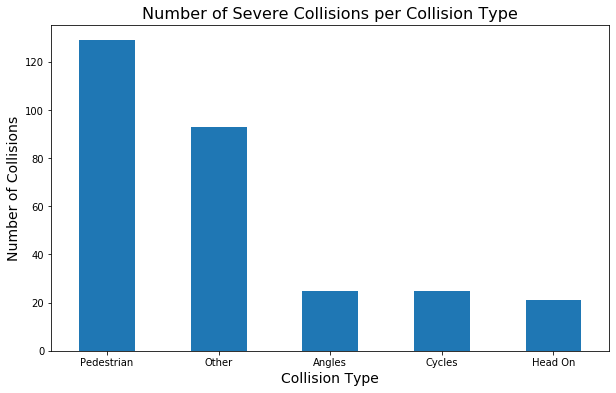

In [22]:
# We will creat a bar chart of collisions per type
df3['COLLISIONTYPE'].replace(np.NaN,'Unknown', inplace=True)
df3['COLLISIONTYPE'].value_counts().head().plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Collision Type', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Severe Collisions per Collision Type',fontsize=16) # add title to the plot

In [23]:
print("The typical number of pedestrians and/or cyclists involved in a collision of severity 0 is", df0['PED/CYL'].mean()) # This should be 0.0 by definition
print("The typical number of pedestrians and/or cyclists involved in a collision of severity 1 is", df1['PED/CYL'].mean())
print("The typical number of pedestrians and/or cyclists involved in a collision of severity 2 is", df2['PED/CYL'].mean())
print("The typical number of pedestrians and/or cyclists involved in a collision of severity 2b is", df2b['PED/CYL'].mean())
print("The typical number of pedestrians and/or cyclists involved in a collision of severity 3 is", df3['PED/CYL'].mean())

The typical number of pedestrians and/or cyclists involved in a collision of severity 0 is 0.0
The typical number of pedestrians and/or cyclists involved in a collision of severity 1 is 0.010273972602739725
The typical number of pedestrians and/or cyclists involved in a collision of severity 2 is 0.19558165739065114
The typical number of pedestrians and/or cyclists involved in a collision of severity 2b is 0.4569300518134715
The typical number of pedestrians and/or cyclists involved in a collision of severity 3 is 0.5114942528735632


In [24]:
print("The typical number of serious injuries or fatalities involved in a collision of severity 2b is", df2b['INJ/FAT'].mean())
print("The typical number of serious injuries or fatalities involved in a collision of severity 3 is", df3['INJ/FAT'].mean()) # 0.0 for previous categories

The typical number of serious injuries or fatalities involved in a collision of severity 2b is 1.0518134715025906
The typical number of serious injuries or fatalities involved in a collision of severity 3 is 1.3620689655172413


In [25]:
df3['MORNING'].head()

1010    0
1247    1
1678    0
2686    0
3579    0
Name: MORNING, dtype: int32

Text(0.5, 1.0, 'Number of Severe Collisions During Each Time Period')

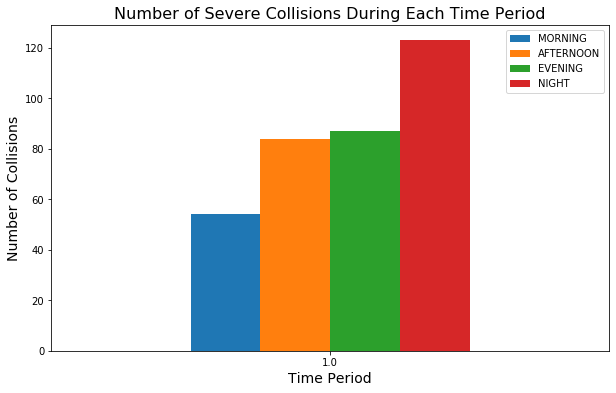

In [26]:
# Plot number of severe collisions per time period
period=['MORNING','AFTERNOON','EVENING','NIGHT']
df3_temp=df3 # Copying df3 dataframe to make changes to columns
df3_temp['MORNING'].replace(0,np.NaN,inplace=True) # Get rid of 0 values, only concerned with 1
df3_temp['AFTERNOON'].replace(0,np.NaN,inplace=True)
df3_temp['EVENING'].replace(0,np.NaN,inplace=True)
df3_temp['NIGHT'].replace(0,np.NaN,inplace=True)
df3_temp[period].apply(pd.Series.value_counts).plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Time Period', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Severe Collisions During Each Time Period',fontsize=16) # add title to the plot

In [27]:
df3['MORNING'].value_counts(dropna=False) # Check df3 is unchanged

NaN    294
1.0     54
Name: MORNING, dtype: int64

In [28]:
# Tells us more information about most common types of collisions 
df['SDOT_COLCODE'].value_counts().head()

11.0    91749
14.0    59092
0.0     19133
16.0    10913
28.0     9557
Name: SDOT_COLCODE, dtype: int64

In [29]:
# Tells us more information about most common types of severe collisions
df3['SDOT_COLCODE'].value_counts().head()

24.0    133
11.0     76
28.0     62
26.0     24
18.0     18
Name: SDOT_COLCODE, dtype: int64

In [30]:
df['INATTENTIONIND'].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

In [31]:
df['UNDERINFL'].value_counts()

N    103344
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [32]:
# Dataframe of total collisions per time period
data0=[['MORNING',(df_morn.shape)[0]],
      ['AFTERNOON',(df_after.shape)[0]],
      ['EVENING',(df_eve.shape)[0]],
      ['NIGHT',(df_night.shape)[0]]]
df_temp0 = pd.DataFrame(data0, columns = ['Period', 'Num of Collisions'])
df_temp0.set_index('Period', inplace=True)
df_temp0

,Num of Collisions
Period,
MORNING,39753
AFTERNOON,69540
EVENING,40019
NIGHT,71500


Text(0.5, 1.0, 'Number of Collisions for Each Time Period')

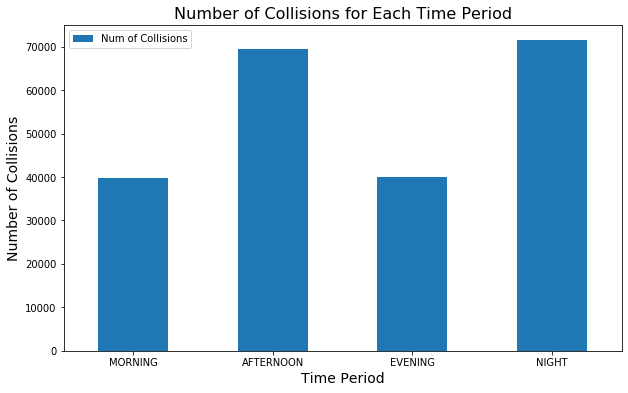

In [33]:
df_temp0.plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Time Period', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Collisions for Each Time Period',fontsize=16) # add title to the plot

In [34]:
# Dataframe of drivers either inattentive or under the influence during a collision per time period
data2=[['MORNING',(df_morn['INATTENTIONIND'].value_counts()[0]),(df_morn['UNDERINFL'].value_counts()[2])],
      ['AFTERNOON',(df_after['INATTENTIONIND'].value_counts()[0]),(df_after['UNDERINFL'].value_counts()[2])],
      ['EVENING',(df_eve['INATTENTIONIND'].value_counts()[0]),(df_eve['UNDERINFL'].value_counts()[2])],
      ['NIGHT',(df_night['INATTENTIONIND'].value_counts()[0]),(df_night['UNDERINFL'].value_counts()[3])]]
df_temp2 = pd.DataFrame(data2, columns = ['Period', 'Inattention', 'UnderInfluence'])
df_temp2.set_index('Period', inplace=True)
df_temp2

,Inattention,UnderInfluence
Period,,
MORNING,7527,310
AFTERNOON,12098,717
EVENING,5366,2338
NIGHT,5197,2034


Text(0.5, 1.0, 'Number of Collisions With Inattention/UnderInfluence per Time Period')

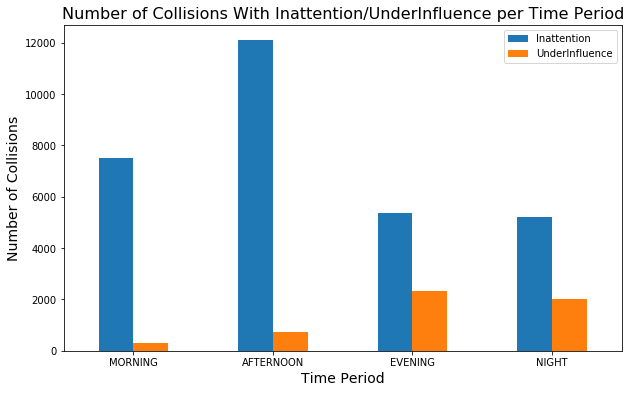

In [35]:
df_temp2.plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Time Period', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Collisions With Inattention/UnderInfluence per Time Period',fontsize=16) # add title to the plot

In [36]:
# Dataframe of percentage of drivers either inattentive or under the influence during a collision per time period
data1=[['MORNING',(df_morn['INATTENTIONIND'].value_counts()[0])/(df_morn.shape[0])*100,(df_morn['UNDERINFL'].value_counts()[2])/(df_morn.shape[0])*100],
      ['AFTERNOON',(df_after['INATTENTIONIND'].value_counts()[0])/(df_after.shape[0])*100,(df_after['UNDERINFL'].value_counts()[2])/(df_after.shape[0])*100],
      ['EVENING',(df_eve['INATTENTIONIND'].value_counts()[0])/(df_eve.shape[0])*100,(df_eve['UNDERINFL'].value_counts()[2])/(df_eve.shape[0])*100],
      ['NIGHT',(df_night['INATTENTIONIND'].value_counts()[0])/(df_night.shape[0])*100,(df_night['UNDERINFL'].value_counts()[3])/(df_night.shape[0])*100]]
df_temp1 = pd.DataFrame(data1, columns = ['Period', 'Inattention (%)', 'UnderInfluence (%)'])
df_temp1.set_index('Period', inplace=True)
df_temp1

,Inattention (%),UnderInfluence (%)
Period,,
MORNING,18.934420,0.779815
AFTERNOON,17.397181,1.031061
EVENING,13.408631,5.842225
NIGHT,7.268531,2.844755


Text(0.5, 1.0, 'Percentage of Inattention and UnderInfluence per Time Period')

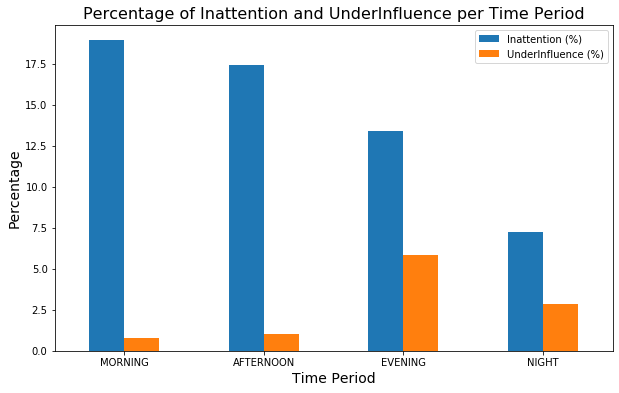

In [37]:
df_temp1.plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Time Period', fontsize=14) # add to x-label to the plot
plt.ylabel('Percentage', fontsize=14) # add y-label to the plot
plt.title('Percentage of Inattention and UnderInfluence per Time Period',fontsize=16) # add title to the plot

In [38]:
# Dataframe of percentage of drivers either inattentive or under the influence during a collision per severity class
data=[['0',0,0],
      ['1',(df1['INATTENTIONIND'].value_counts()[0])/(df1.shape[0])*100,(df1['UNDERINFL'].value_counts()[2])/(df1.shape[0])*100],
      ['2',(df2['INATTENTIONIND'].value_counts()[0])/(df2.shape[0])*100,(df2['UNDERINFL'].value_counts()[2])/(df2.shape[0])*100],
      ['2b',(df2b['INATTENTIONIND'].value_counts()[0])/(df2b.shape[0])*100,(df2b['UNDERINFL'].value_counts()[2])/(df2b.shape[0])*100],
      ['3',(df3['INATTENTIONIND'].value_counts()[0])/(df3.shape[0])*100,(df3['UNDERINFL'].value_counts()[3])/(df3.shape[0])*100]]
df_temp = pd.DataFrame(data, columns = ['Severity', 'Inattention (%)', 'UnderInfluence (%)'])
df_temp.set_index('Severity', inplace=True)
df_temp

,Inattention (%),UnderInfluence (%)
Severity,,
0,0.000000,0.000000
1,14.143107,2.324395
2,17.757025,3.310342
2b,11.690415,7.383420
3,4.597701,12.068966


Text(0.5, 1.0, 'Percentage of Inattention and UnderInfluence per Severity Class')

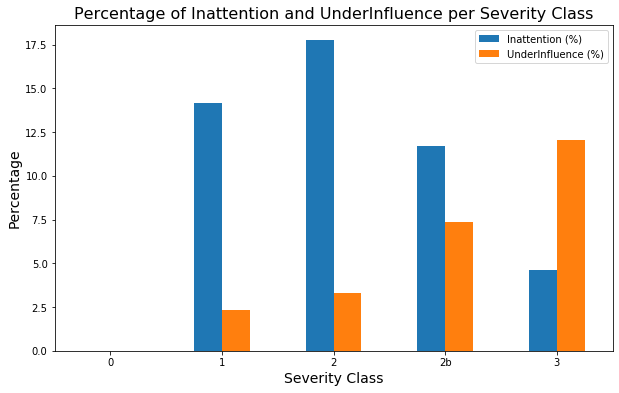

In [39]:
df_temp.plot(kind='bar', figsize=(10, 6), rot = 'horizontal')
plt.xlabel('Severity Class', fontsize=14) # add to x-label to the plot
plt.ylabel('Percentage', fontsize=14) # add y-label to the plot
plt.title('Percentage of Inattention and UnderInfluence per Severity Class',fontsize=16) # add title to the plot

In [40]:
df['WEATHER'].value_counts()

Clear                       114265
Raining                      34001
Overcast                     28489
Unknown                      15131
Snowing                        919
Other                          851
Fog/Smog/Smoke                 576
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

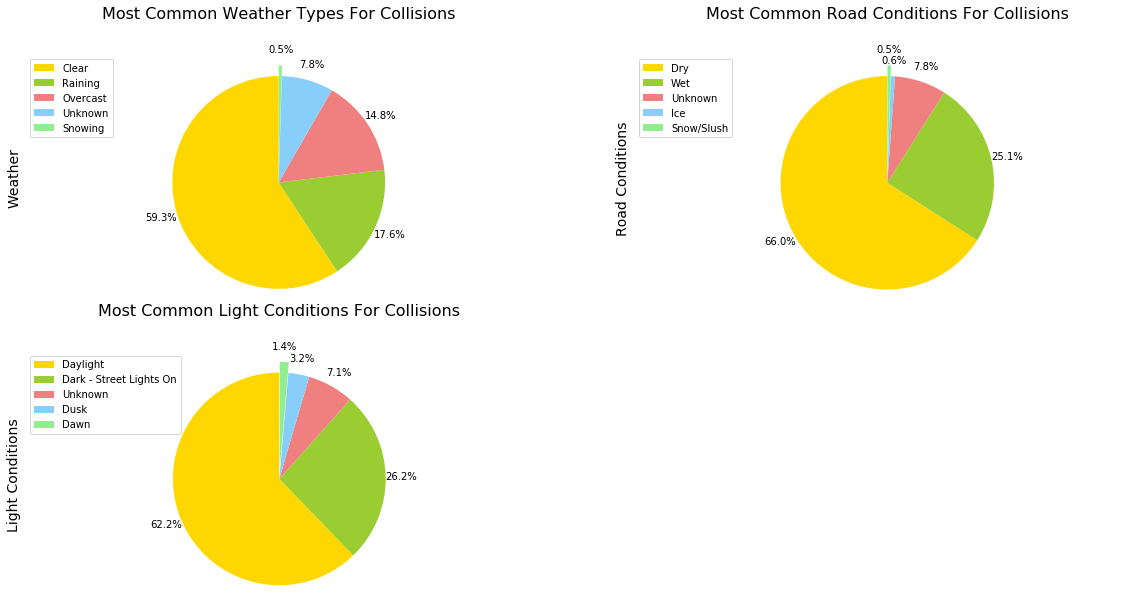

In [41]:
# Plot weather, road and lighting conditions corresponding to most collisions
fig = plt.figure() 
ax0 = fig.add_subplot(2, 2, 1) 
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0, 0.1] # ratio for each condition with which to offset each wedge.

df['WEATHER'].value_counts().head().plot(kind='pie', 
                            ax=ax0,
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest condition
                            )

# scale the title up by 12% to match pctdistance
ax0.set_title('Most Common Weather Types For Collisions', y=1.12, fontsize=16)
ax0.set_ylabel('Weather',fontsize=14)
ax0.axis('equal')  # Sets the pie chart to look like a circle.
# add legend
ax0.legend(labels=df['WEATHER'].value_counts().index, loc='upper left') 

df['ROADCOND'].value_counts().head().plot(kind='pie', 
                            ax=ax1,
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest condition
                            )

ax1.set_title('Most Common Road Conditions For Collisions', y=1.12,fontsize=16)
ax1.set_ylabel('Road Conditions',fontsize=14)
ax1.axis('equal')  # Sets the pie chart to look like a circle.
ax1.legend(labels=df['ROADCOND'].value_counts().index, loc='upper left') 

df['LIGHTCOND'].value_counts().head().plot(kind='pie', 
                            ax=ax2,
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest condition
                            )

ax2.set_title('Most Common Light Conditions For Collisions', y=1.12, fontsize=16)
ax2.set_ylabel('Light Conditions',fontsize=14)
ax2.axis('equal')  # Sets the pie chart to look like a circle.
ax2.legend(labels=df['LIGHTCOND'].value_counts().index, loc='upper left') 

plt.show()

In [42]:
df3['WEATHER'].value_counts()

Clear               227
Overcast             53
Raining              50
Fog/Smog/Smoke        3
Other                 3
Severe Crosswind      1
Unknown               1
Name: WEATHER, dtype: int64

In [43]:
df3['ROADCOND'].value_counts()

Dry        267
Wet         69
Ice          1
Unknown      1
Name: ROADCOND, dtype: int64

In [44]:
df3['LIGHTCOND'].value_counts()

Daylight                    168
Dark - Street Lights On     145
Dusk                         14
Dawn                          5
Dark - Street Lights Off      4
Unknown                       1
Dark - No Street Lights       1
Name: LIGHTCOND, dtype: int64

In [45]:
# Most collisions occur during daytime in clear, dry conditions. This does not tell us much about the
# effect of such conditions on collisions. To determine this we could gather statistics on the daily
# weather in Seattle and normalize the data to get a better picture of whether collisions occurred
# disproportionately to the weather

In [46]:
df[df['INJURIES']==12] # Let's take a look at the collision that caused the most injuries in the dataset

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,PED/CYL,INJ/FAT,MORNING,AFTERNOON,EVENING,NIGHT
130187,-122.328913,47.613466,130188,145917,145937,3573476,Matched,Intersection,29878.0,BOREN AVE AND PIKE ST,...,Entering at angle,0,0,N,0,0,0,1,0,0


In [47]:
df[df['FATALITIES']==5]  # Let's take a look at the collision that caused the most fatalities in the dataset

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,PED/CYL,INJ/FAT,MORNING,AFTERNOON,EVENING,NIGHT
163522,-122.347294,47.647172,163523,203057,203197,3703661,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,From opposite direction - all others,0,0,N,0,46,1,0,0,0


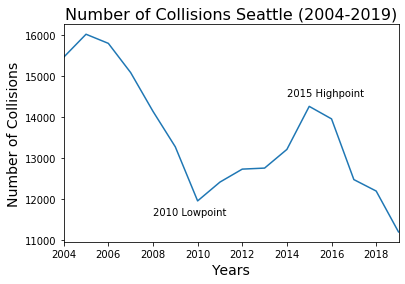

In [48]:
# Plot of total collisions through the years 2004-2019
df_time=df['INCDTTM'].dt.year.value_counts(sort=False)
df_time.drop([2003, 2020], inplace=True)  # drop outliers
df_time.plot(kind='line')
plt.xlabel('Years', fontsize=14) # add to x-label to the plot
plt.ylabel('Number of Collisions', fontsize=14) # add y-label to the plot
plt.title('Number of Collisions Seattle (2004-2019)',fontsize=16) # add title to the plot
plt.text(2008, 11600, '2010 Lowpoint') # annotate graph at local high and low points
plt.text(2014, 14500, '2015 Highpoint')
plt.show() 

### Build Model

In [49]:
# Before building machine learning model we must balance labels, ensure dataframe is purely numerical (no NaNs/blanks...), 
# get rid of unnecessary columns, turn dataframe to numpy array and normalize data

In [50]:
# Choose following attributes for our model (we will include our target variable for reasons discussed later):
# 'PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
# 'FATALITIES','SDOT_COLCODE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'ST_COLCODE',
# 'MORNING', 'AFTERNOON', 'EVENING', 'NIGHT'
df_features = df[['PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
              'FATALITIES','SDOT_COLCODE','INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'ST_COLCODE',
              'MORNING', 'AFTERNOON', 'EVENING', 'NIGHT', 'SEVERITYCODE']]

In [51]:
df_features.shape

(220812, 17)

In [52]:
# We must change all types to int
df_features.dtypes

PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
SDOT_COLCODE       float64
INATTENTIONIND      object
UNDERINFL           object
SPEEDING            object
ST_COLCODE          object
MORNING              int32
AFTERNOON            int32
EVENING              int32
NIGHT                int32
SEVERITYCODE        object
dtype: object

In [53]:
# We see there is 1 Na value in this column
df_features['SDOT_COLCODE'].value_counts(dropna=False)

11.0    91749
14.0    59092
0.0     19133
16.0    10913
28.0     9557
24.0     7683
13.0     6869
26.0     5059
18.0     3419
15.0     1813
12.0     1775
51.0     1468
29.0      559
21.0      205
56.0      199
27.0      173
54.0      153
23.0      129
48.0      119
31.0      111
25.0      110
34.0      100
64.0       98
69.0       86
33.0       57
55.0       56
66.0       31
22.0       19
44.0       16
32.0       13
53.0        9
61.0        7
58.0        6
68.0        6
35.0        6
36.0        4
46.0        4
52.0        2
47.0        2
87.0        1
NaN         1
Name: SDOT_COLCODE, dtype: int64

In [54]:
# Get rid of Na value(s) and turn type into int
df_features = df_features[pd.to_numeric(df_features['SDOT_COLCODE'], errors='coerce').notnull()]
df_features['SDOT_COLCODE'] = df_features['SDOT_COLCODE'].astype('int')

In [55]:
df_features['INATTENTIONIND'].value_counts(dropna=False)

NaN    190623
Y       30188
Name: INATTENTIONIND, dtype: int64

In [56]:
df_features['INATTENTIONIND'].replace([np.NaN,'Y'],[0,1],inplace=True) # can do this because NaNs most likely represent attention

In [57]:
df_features = df_features[pd.to_numeric(df_features['INATTENTIONIND'], errors='coerce').notnull()]
df_features['INATTENTIONIND'] = df_features['INATTENTIONIND'].astype('int')

In [58]:
df_features['UNDERINFL'].value_counts(dropna=False) #too many NaNs, will take away too much row information 
# we will get rid of this column

N      103344
0       81676
NaN     26162
Y        5399
1        4230
Name: UNDERINFL, dtype: int64

In [59]:
df_features['SPEEDING'].value_counts(dropna=False)

NaN    210915
Y        9896
Name: SPEEDING, dtype: int64

In [60]:
df_features['SPEEDING'].replace([np.NaN,'Y'],[0,1],inplace=True) # can do this because NaNs most likely represent no speeding

In [61]:
df_features = df_features[pd.to_numeric(df_features['SPEEDING'], errors='coerce').notnull()]
df_features['SPEEDING'] = df_features['SPEEDING'].astype('int')

In [62]:
df_features['ST_COLCODE'].value_counts(dropna=False)

32    44827
10    35434
14    26139
      16770
50    14100
      ...  
43        3
87        2
85        1
49        1
60        1
Name: ST_COLCODE, Length: 64, dtype: int64

In [63]:
df_features = df_features[pd.to_numeric(df_features['ST_COLCODE'], errors='coerce').notnull()]
df_features['ST_COLCODE'] = df_features['ST_COLCODE'].astype('int')

In [64]:
df_features.shape #lost rows, acceptable as we will be taking a smaller sample of rows further down

(194629, 17)

In [65]:
df_features.drop('UNDERINFL',axis=1, inplace=True) # drop under the influence column due to poor data

In [66]:
df_features.dtypes # dataframe ready to be used in machine learning model

PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INJURIES            int64
SERIOUSINJURIES     int64
FATALITIES          int64
SDOT_COLCODE        int32
INATTENTIONIND      int32
SPEEDING            int32
ST_COLCODE          int32
MORNING             int32
AFTERNOON           int32
EVENING             int32
NIGHT               int32
SEVERITYCODE       object
dtype: object

In [67]:
df_features['SEVERITYCODE'].value_counts() #We will now balance the labels, we will not use category '0'

1     133594
2      57650
2b      3046
3        338
0          1
Name: SEVERITYCODE, dtype: int64

In [68]:
# Create new dataframes divided by category
df_features1=df_features[(df_features['SEVERITYCODE']=='1')]
df_features2=df_features[(df_features['SEVERITYCODE']=='2')]
df_features2b=df_features[(df_features['SEVERITYCODE']=='2b')]
df_features3=df_features[(df_features['SEVERITYCODE']=='3')]
df_features3.shape # Check

(338, 16)

In [69]:
df_features1_new=df_features1.sample(338) # Balancing labels by taking random samples of each severity category,  
df_features1_new.shape # each the same size as the samllest category (severity = 3)

(338, 16)

In [70]:
df_features2_new=df_features2.sample(338)
df_features2b_new=df_features2b.sample(338)

In [71]:
df_features1_new=df_features1_new.append(df_features2_new, ignore_index=True) # Add all dataframes together

In [72]:
df_features1_new=df_features1_new.append(df_features2b_new, ignore_index=True)

In [73]:
df_features1_new=df_features1_new.append(df_features3, ignore_index=True)

In [74]:
df_features1_new['SEVERITYCODE'].value_counts() # new balanced dataframe

3     338
1     338
2     338
2b    338
Name: SEVERITYCODE, dtype: int64

In [75]:
df_features1_new=df_features1_new.sample(frac=1) #randomly shuffle dataframe

In [76]:
# Turn dataframe into Numpy array for use in machine learning model
X=df_features1_new[['PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
              'FATALITIES','SDOT_COLCODE','INATTENTIONIND', 'SPEEDING', 'ST_COLCODE',
              'MORNING', 'AFTERNOON', 'EVENING', 'NIGHT']].values
X[0:5]

array([[ 2,  0,  0,  2,  0,  0,  0, 14,  0,  0, 14,  0,  0,  0,  1],
       [ 2,  0,  0,  2,  0,  0,  0, 11,  0,  0, 71,  1,  0,  0,  0],
       [ 4,  0,  0,  3,  1,  0,  1, 26,  0,  1, 50,  0,  0,  1,  0],
       [ 2,  1,  1,  0,  2,  1,  0,  0,  0,  0, 45,  0,  1,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  1, 24,  0,  1,  0,  0,  0,  0,  1]],
      dtype=int64)

In [77]:
X.shape #1352 rows 15 columns/attributes

(1352, 15)

In [78]:
# Target variable Numpy array
y=df_features1_new['SEVERITYCODE'].values
y[0:5]

array(['1', '1', '3', '2b', '3'], dtype=object)

In [79]:
# Normalize Numpy array for model
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.22335955, -0.49586616, -0.26091012,  0.33152869, -0.38995059,
        -0.27558716, -0.53833428, -0.42247386, -0.37540414, -0.35722029,
        -0.42701932, -0.49143257, -0.69576104, -0.53401414,  1.69854569],
       [-0.22335955, -0.49586616, -0.26091012,  0.33152869, -0.38995059,
        -0.27558716, -0.53833428, -0.75175018, -0.37540414, -0.35722029,
         2.75956119,  2.03486717, -0.69576104, -0.53401414, -0.58873895],
       [ 0.44622386, -0.49586616, -0.26091012,  1.59770608,  0.03694269,
        -0.27558716,  1.47780962,  0.89463142, -0.37540414,  2.79939302,
         1.58555784, -0.49143257, -0.69576104,  1.87260959, -0.58873895],
       [-0.22335955,  1.57970984,  3.6585397 , -2.20082608,  0.46383597,
         0.53793652, -0.53833428, -1.95909669, -0.37540414, -0.35722029,
         1.30603324, -0.49143257,  1.43727507, -0.53401414, -0.58873895],
       [-0.22335955,  1.57970984, -0.26091012, -0.93464869, -0.38995059,
        -0.27558716,  1.47780962,  0.67511388, 

In [80]:
# Create Training and Test Set from our data, split 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1081, 15) (1081,)
Test set: (271, 15) (271,)


In [81]:
# Build K Nearest Neighbor (KNN) machine learning model
# Find best value for k by iterating through and comparing the accuracy of k from 1-10
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.87453875, 0.88929889, 0.87822878, 0.85608856, 0.84870849,
       0.86346863, 0.87822878, 0.86346863, 0.8597786 ])

In [82]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
# at roughly this level of accuracy we do not need to use another machine learning model

The best accuracy was with 0.8892988929889298 with k= 2


In [86]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
yhat=neigh.predict(X_test)

### Evaluation

In [87]:
# Jaccard Score
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\shane\Downloads\Python\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8892988929889298

In [88]:
# F1-Score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.89053300125552